# Part A

**DOMAIN:**  Digital content and entertainment industry

**CONTEXT:**  The objective of this project is to build a text classification model that analyses the customer's sentiments
based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer
followed by a classification algorithm to analyse the sentiment of the customers.

**DATA DESCRIPTION:**  The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews
have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the
words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the
first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does
not stand for a specific word, but instead is used to encode any unknown word.

**PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the customer
sentiments.
 

# Steps and tasks:

# Part A - Q1 - Import and analyse the data set.


In [33]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import tensorflow as tf
print(tf.__version__) 
import cv2
from glob import glob

2.14.0


# Part A - Q1 - Import and analyse the data set.

In [34]:
# Step 1: Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Step 2: Load the IMDB dataset
vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Step 3: Analyze the dataset
print("Number of training samples:", len(train_data))
print("Number of testing samples:", len(test_data))

# Step 4: Display sample data
print("Sample review:")
print(train_data[0])  # Displaying the first review

# Step 5: Preprocess the data by padding sequences to a fixed length
max_len = 20
train_data = sequence.pad_sequences(train_data, maxlen=max_len)
test_data = sequence.pad_sequences(test_data, maxlen=max_len)

# Step 6: Display processed data
print("Processed training data:")
print(train_data[0])  # Displaying the first processed review

# Step 7: Display labels
print("Sample label:")
print(train_labels[0])  # Displaying the label of the first review (0 for negative, 1 for positive)


Number of training samples: 25000
Number of testing samples: 25000
Sample review:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 1

# Part A - Q2 - Perform relevant sequence adding on the data.

In [35]:
# Step 5: Preprocess the data by padding sequences to a fixed length
max_len = 20
train_data = sequence.pad_sequences(train_data, maxlen=max_len)
test_data = sequence.pad_sequences(test_data, maxlen=max_len)

# Display some information about the data
print("Number of training samples:", len(train_data))
print("Number of testing samples:", len(test_data))    
print("Shape of padded training data:", train_data.shape)
print("Shape of padded testing data:", test_data.shape)

# Display a sample review and its sentiment label
print("Sample Review:")
print(train_data[0])  
print("Sentiment Label:")
print(train_labels[0])  

Number of training samples: 25000
Number of testing samples: 25000
Shape of padded training data: (25000, 20)
Shape of padded testing data: (25000, 20)
Sample Review:
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
Sentiment Label:
1


# Part A - Q3 - Perform following data analysis: 
    i) Print shape of features and labels 
    ii) Print value of any one feature and it's label

In [36]:
# Step 8: Perform data analysis
# i) Print shape of features and labels
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing labels:", test_labels.shape)

# ii) Print value of any one feature and its label
sample_index = 0
print("\nSample Feature (padded sequence):")
print(train_data[sample_index])

print("\nCorresponding Label:")
print(train_labels[sample_index])


Shape of training data: (25000, 20)
Shape of testing data: (25000, 20)
Shape of training labels: (25000,)
Shape of testing labels: (25000,)

Sample Feature (padded sequence):
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]

Corresponding Label:
1


# Part A - Q4 - Decode the feature value to get original sentence

In [37]:
# Step 9: Decode the feature value to get the original sentence
word_index = imdb.get_word_index()

# Reverse the word index mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Function to decode a sequence into the original sentence
def decode_sequence(sequence):
    return ' '.join([reverse_word_index.get(i, '?') for i in sequence])

# Decode the first training data sample
decoded_sentence = decode_sequence(train_data[sample_index])

# Print the decoded sentence
print("\nDecoded Sentence:")
print(decoded_sentence)



Decoded Sentence:
their with her nobody most that with wasn't to with armed acting watch an for with heartfelt film want an


# Part A - Q5 - Design, train, tune and test a sequential model


Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            500000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               60400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 560501 (2.14 MB)
Trainable params: 560501 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 19s 50ms/step - loss: 0.5445 - accuracy: 0.7121 - val_loss: 0.4910 - val_accuracy: 0.7524
Epoch 2/5
313/313 [==============================] - 14s 46ms/step - loss: 0.4037 - accuracy: 0.8152 - val_loss: 0.496

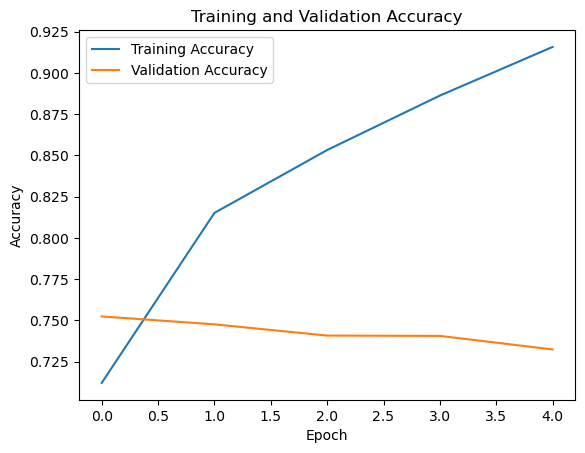

In [38]:
# Step 10: Design, train, tune, and test a sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define model architecture
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
print("\nModel Summary:")
print(model.summary())

# Train the model
batch_size = 64
epochs = 5
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("\nTest Accuracy:", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Part A - Q6 - Use the designed model to print the prediction on any one sample.

In [39]:
# Step 11: Use the designed model to print the prediction on any one sample
import numpy as np

# Choose any one sample index from the test set
sample_index_to_predict = 42

# Get the corresponding sequence from the test data
sequence_to_predict = test_data[sample_index_to_predict]

# Make the prediction
prediction = model.predict(np.array([sequence_to_predict]))

# Print the original sentence
original_sentence = decode_sequence(test_data[sample_index_to_predict])
print("\nOriginal Sentence:")
print(original_sentence)

# Print the predicted sentiment (1 for positive, 0 for negative)
predicted_sentiment = round(prediction[0][0])
print("\nPredicted Sentiment:")
print("Positive" if predicted_sentiment == 1 else "Negative")

# Print the actual sentiment label (1 for positive, 0 for negative)
actual_sentiment = test_labels[sample_index_to_predict]
print("\nActual Sentiment:")
print("Positive" if actual_sentiment == 1 else "Negative")


1/1 [==============================] - 1s 694ms/step

Original Sentence:
have pretty try son and upon season some of cute scary wonderland either i i major later am some br

Predicted Sentiment:
Negative

Actual Sentiment:
Negative


In [40]:
# Step 11: Use the designed model to print the prediction on any one sample
import numpy as np

# Choose any one sample index from the test set
sample_index_to_predict = 16

# Get the corresponding sequence from the test data
sequence_to_predict = test_data[sample_index_to_predict]

# Make the prediction
prediction = model.predict(np.array([sequence_to_predict]))

# Print the original sentence
original_sentence = decode_sequence(test_data[sample_index_to_predict])
print("\nOriginal Sentence:")
print(original_sentence)

# Print the predicted sentiment (1 for positive, 0 for negative)
predicted_sentiment = round(prediction[0][0])
print("\nPredicted Sentiment:")
print("Positive" if predicted_sentiment == 1 else "Negative")

# Print the actual sentiment label (1 for positive, 0 for negative)
actual_sentiment = test_labels[sample_index_to_predict]
print("\nActual Sentiment:")
print("Positive" if actual_sentiment == 1 else "Negative")


1/1 [==============================] - 0s 22ms/step

Original Sentence:
especially well might when was might to especially after could of on just as was then looking her fiction fiction

Predicted Sentiment:
Positive

Actual Sentiment:
Positive


# DOMAIN: Social media analytics
**• CONTEXT:** Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision
but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and
detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model
to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

**• DATA DESCRIPTION:**
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces
the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as
compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real
sarcastic elements

**Content:** Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
 Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection
 
**• PROJECT OBJECTIVE**: Build a sequential NLP classifier which can use input text parameters to determine the customer
sentiments.


# Part B - Q1 - Read and explore the data

In [41]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
data_url = "https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json"
df = pd.read_json(data_url, lines=True)

# Step 3: Explore the dataset
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0  

In [42]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df['headline']
y = df['is_sarcastic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)


Training set shape - X: (22895,) y: (22895,)
Testing set shape - X: (5724,) y: (5724,)


# Part B - Q2 - Retain relevant columns

In [43]:
# Retain relevant columns
df = df[['is_sarcastic', 'headline']]

# Display the updated DataFrame
print(df.head())


   is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep. totally nails why congress is falling...
2             0  eat your veggies: 9 deliciously different recipes
3             1  inclement weather prevents liar from getting t...
4             1  mother comes pretty close to using word 'strea...


# Part B - Q3 - Get length of each sentence

In [44]:
# Step 5: Get the length of each sentence
# Get the length of each sentence and create a new column 'headline_length'
df['headline_length'] = df['headline'].apply(len)

# Display the updated DataFrame with the 'headline_length' column
print(df[['headline', 'headline_length']].head())


                                            headline  headline_length
0  thirtysomething scientists unveil doomsday clo...               61
1  dem rep. totally nails why congress is falling...               79
2  eat your veggies: 9 deliciously different recipes               49
3  inclement weather prevents liar from getting t...               52
4  mother comes pretty close to using word 'strea...               61


# Part B - Q4 - Define parameters

In [45]:
# Step 6: Define Parameters
max_features = 10000  # Number of words to take from tokenizer
maxlen = 30          # Maximum length of each sentence
embedding_size = 50  # Size of the embedding vector


# Part B - Q5 - Get indices for words

In [46]:
# Step 7: Tokenize the sentences to get word indices
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Get the word indices for each sentence
X_train_indices = tokenizer.texts_to_sequences(X_train)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train_indices, maxlen=maxlen, padding='post', truncating='post')

# Display the first example and its indices
print("Original Sentence:", X_train.iloc[0])
print("Word Indices:", X_train_indices[0])
print("Padded Sequence:", X_train_padded[0])


Original Sentence: how trump really feels about queer people, explained in one sentence
Word Indices: [27, 13, 109, 638, 17, 781, 67, 4774, 5, 43, 1939]
Padded Sequence: [  27   13  109  638   17  781   67 4774    5   43 1939    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


# Part B - Q6 - Create features and labels

In [47]:
# Step 8: Create features (X) and labels (y)

# Features (input data)
X_train_features = X_train_padded

# Labels
y_train_labels = y_train.values

# Display the shapes of features and labels
print("Features shape:", X_train_features.shape)
print("Labels shape:", y_train_labels.shape)



Features shape: (22895, 30)
Labels shape: (22895,)


In [48]:
# Features (input data)
X_train_features = X_train_padded

# Labels
y_train_labels = y_train.values

# Display the shapes of features and labels
print("Features shape:", X_train_features.shape)
print("Labels shape:", y_train_labels.shape)


# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Tokenize and pad sequences for validation data
X_val_indices = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_indices, maxlen=maxlen, padding='post', truncating='post')

# Features (input data) for validation set
X_val_features = X_val_padded

# Labels for validation set
y_val_labels = y_val.values

# Display the shapes of features and labels for validation set
print("Validation Features shape:", X_val_features.shape)
print("Validation Labels shape:", y_val_labels.shape)

Features shape: (22895, 30)
Labels shape: (22895,)
Validation Features shape: (2290, 30)
Validation Labels shape: (2290,)


# Part B - Q7 - Get vocabulary size

In [49]:
# Step 9: Get vocabulary size
vocabulary_size = len(tokenizer.word_index)

# Display the vocabulary size
print("Vocabulary Size:", vocabulary_size)


Vocabulary Size: 27770


# Part B - Q8 - Create a weight matrix using GloVe embeddings

In [50]:
# Step 10: Create a weight matrix using GloVe embeddings

# Import necessary libraries
import numpy as np

# Update the embedding_path with the correct local path
embedding_path = r"C:\Users\Swarajya Electricals\Downloads\glove.6B.50d.txt"

# Load GloVe embeddings using the reference approach
def load_glove_embedding(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load GloVe embeddings
embeddings_index = load_glove_embedding(embedding_path)

# Update vocabulary_size to match the size of your tokenizer's word index
vocabulary_size = len(tokenizer.word_index) + 1

# Create an embedding matrix
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Display the shape of the embedding matrix
print("\nShape of the embedding matrix:", embedding_matrix.shape)



Shape of the embedding matrix: (27771, 50)


# Part B - Q9 - Define and compile a LSTM model.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
lstm_model = Sequential()

# Add an embedding layer with the GloVe embedding matrix
embedding_layer = Embedding(
    input_dim=vocabulary_size,
    output_dim=embedding_size,  # Ensure this matches the size of GloVe embeddings
    weights=[embedding_matrix],
    input_length=maxlen,  # Match this with the maxlen used in pad_sequences
    trainable=False
)
lstm_model.add(embedding_layer)

# Add an LSTM layer
lstm_model.add(LSTM(100))  # Adjust the number of units if needed

# Add a Dense layer for binary classification (sarcasm detection)
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
print(lstm_model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 50)            1388550   
                                                                 
 lstm_4 (LSTM)               (None, 100)               60400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1449051 (5.53 MB)
Trainable params: 60501 (236.33 KB)
Non-trainable params: 1388550 (5.30 MB)
_________________________________________________________________
None


# Part B - Q10 - Fit the model and check the validation accuracy

In [54]:
# Convert labels to numpy array
y_train_labels = np.array(y_train)

# Check the shapes of your data
print("Original shapes - X_train:", X_train.shape, "y_train_labels:", y_train_labels.shape)

# Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# The word indices for each sentence
X_train_indices = tokenizer.texts_to_sequences(X_train)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train_indices, maxlen=maxlen, padding='post', truncating='post')

# Display the shapes after tokenization and padding
print("Shapes after tokenization and padding - X_train_padded:", X_train_padded.shape, "y_train_labels:", y_train_labels.shape)

# Convert labels to numpy array
y_train_labels = np.array(y_train)

# Check the shapes of your data
print("X_train_features shape:", X_train_padded.shape)
print("y_train_labels shape:", y_train_labels.shape)

# Check if the number of samples match
if X_train_padded.shape[0] != y_train_labels.shape[0]:
    raise ValueError("Number of samples in X_train_padded and y_train_labels do not match.")

# Fit the model
history = lstm_model.fit(
    X_train_padded, y_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_padded, y_val_labels)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = lstm_model.evaluate(X_val_padded, y_val_labels)

# Display validation accuracy
print("\nValidation Accuracy:", val_accuracy)


Original shapes - X_train: (20605,) y_train_labels: (20605,)
Shapes after tokenization and padding - X_train_padded: (20605, 30) y_train_labels: (20605,)
X_train_features shape: (20605, 30)
y_train_labels shape: (20605,)
Epoch 1/5
322/322 [==============================] - 25s 65ms/step - loss: 0.6640 - accuracy: 0.5853 - val_loss: 0.6460 - val_accuracy: 0.6166
Epoch 2/5
322/322 [==============================] - 15s 46ms/step - loss: 0.5755 - accuracy: 0.6843 - val_loss: 0.5949 - val_accuracy: 0.6803
Epoch 3/5
322/322 [==============================] - 15s 46ms/step - loss: 0.5239 - accuracy: 0.7285 - val_loss: 0.5675 - val_accuracy: 0.7013
Epoch 4/5
322/322 [==============================] - 15s 45ms/step - loss: 0.4834 - accuracy: 0.7603 - val_loss: 0.5793 - val_accuracy: 0.6891
Epoch 5/5
72/72 [==============================] - 1s 12ms/step - loss: 0.6153 - accuracy: 0.6948

Validation Accuracy: 0.6947598457336426


# THE END